<a href="https://colab.research.google.com/github/gabriellysilva-git/Bootcamp_WomakersCode/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib seaborn plotly statsmodels

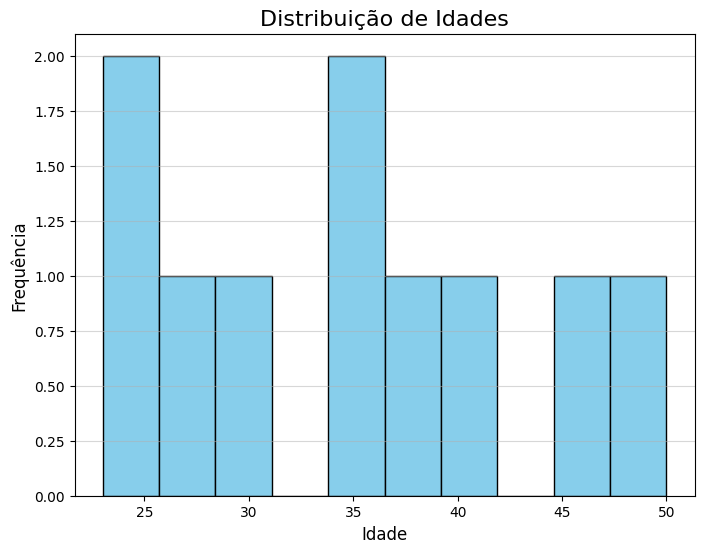

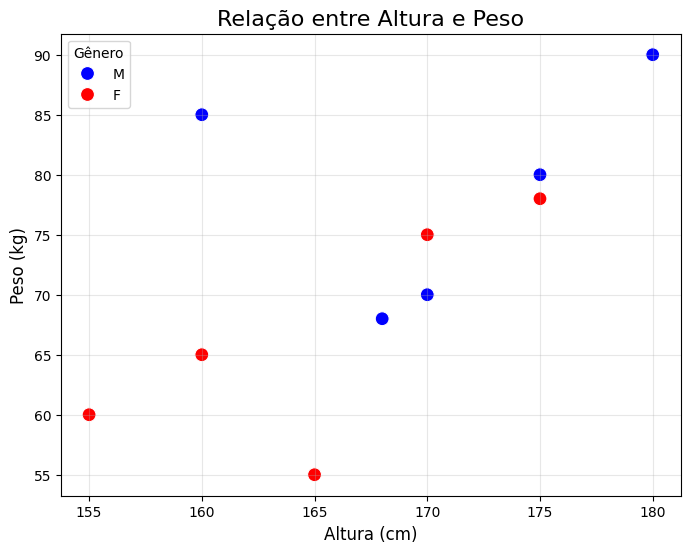

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Tarefa 1: Carregar os dados de saude.csv
saude_df = pd.read_csv('saude.csv')

# Tarefa 2: Criar um histograma da variável 'age' usando Matplotlib
plt.figure(figsize=(8, 6))
plt.hist(saude_df['age'], bins=10, edgecolor='black', color='skyblue')
plt.title('Distribuição de Idades', fontsize=16)
plt.xlabel('Idade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Tarefa 3: Criar um gráfico de dispersão entre 'height' e 'weight' usando Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=saude_df, x='height', y='weight', hue='gender',
                palette={'M': 'blue', 'F': 'red'}, s=100)
plt.title('Relação entre Altura e Peso', fontsize=16)
plt.xlabel('Altura (cm)', fontsize=12)
plt.ylabel('Peso (kg)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title='Gênero')
plt.show()

# Tarefa 4: Criar um gráfico interativo de barras mostrando a contagem por 'gender' usando Plotly
gender_counts = saude_df['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

fig = px.bar(gender_counts, x='gender', y='count',
             color='gender',
             title='Contagem de Indivíduos por Gênero',
             labels={'gender': 'Gênero', 'count': 'Contagem'},
             text='count')
fig.update_traces(textposition='outside')
fig.show()

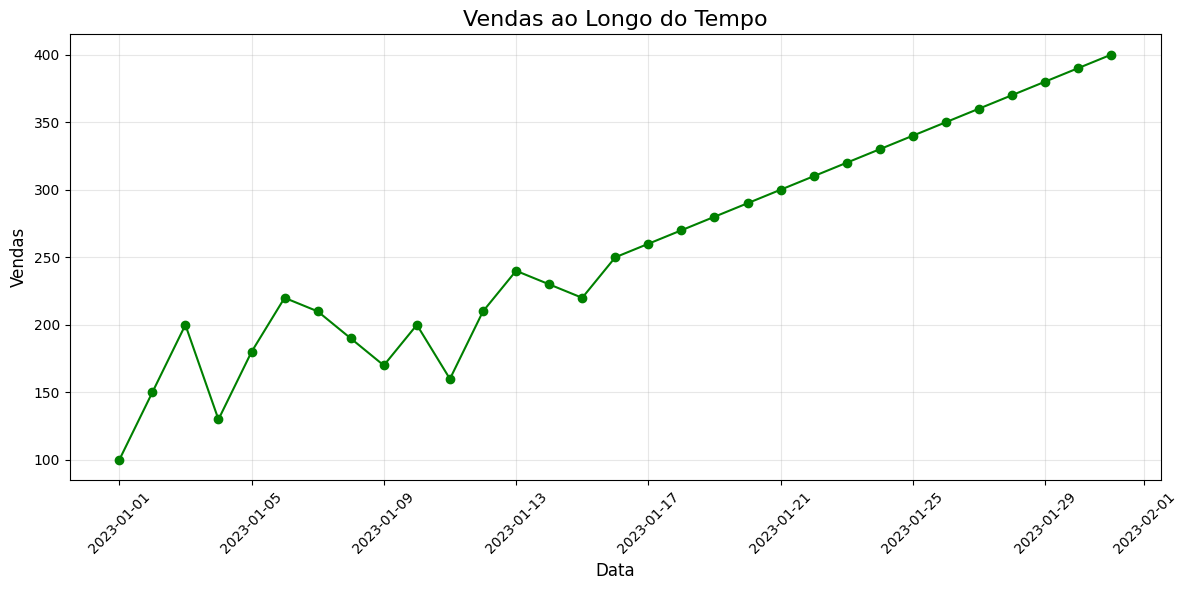

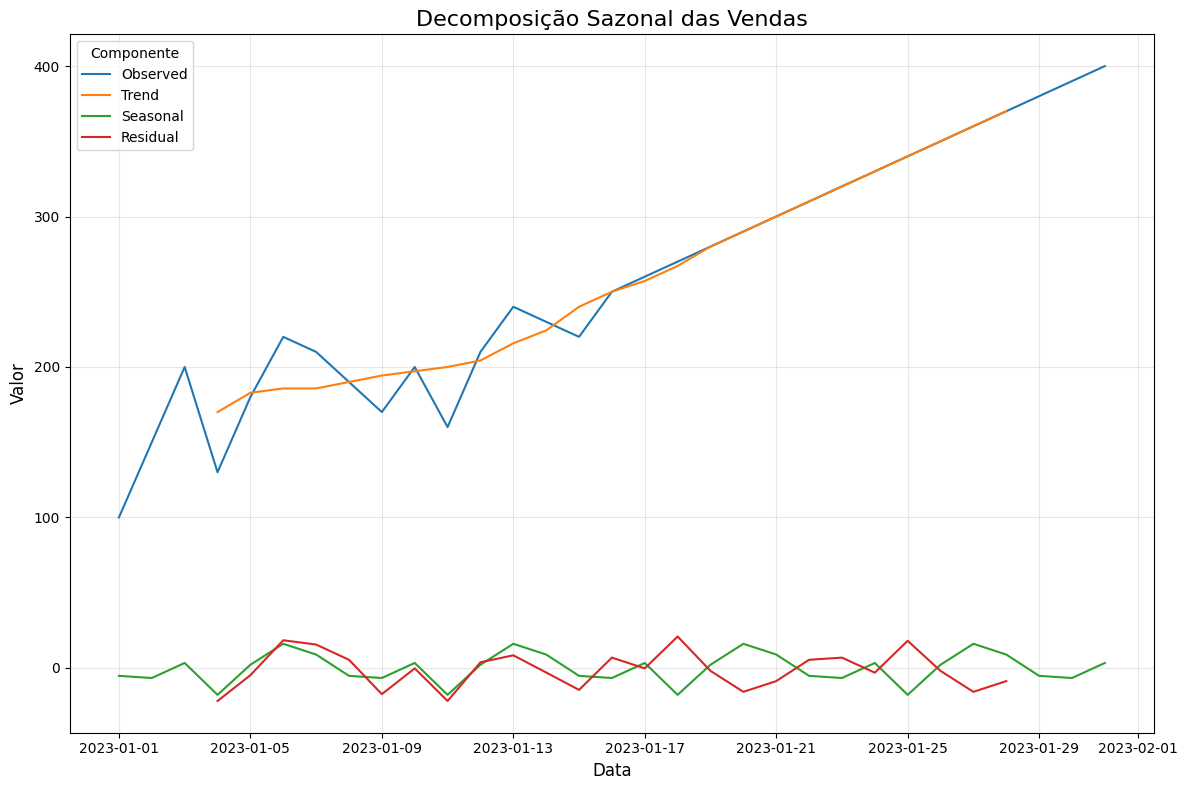

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# Tarefa 1: Carregar os dados de vendas.csv
vendas_df = pd.read_csv('vendas.csv')
vendas_df['date'] = pd.to_datetime(vendas_df['date'])
vendas_df.set_index('date', inplace=True)

# Tarefa 2: Criar um gráfico de linhas das vendas ao longo do tempo usando Matplotlib
plt.figure(figsize=(12, 6))
plt.plot(vendas_df.index, vendas_df['sales'], marker='o', linestyle='-', color='green')
plt.title('Vendas ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Vendas', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tarefa 3: Criar um gráfico de decomposição sazonal usando Seaborn
# Primeiro fazemos a decomposição
result = seasonal_decompose(vendas_df['sales'], model='additive', period=7)

# Preparando os dados para plotagem com Seaborn
decomposed = pd.DataFrame({
    'date': vendas_df.index,
    'Observed': result.observed,
    'Trend': result.trend,
    'Seasonal': result.seasonal,
    'Residual': result.resid
}).melt(id_vars='date', var_name='Component', value_name='Value')

plt.figure(figsize=(12, 8))
sns.lineplot(data=decomposed, x='date', y='Value', hue='Component')
plt.title('Decomposição Sazonal das Vendas', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(title='Componente')
plt.tight_layout()
plt.show()

# Tarefa 4: Criar um gráfico interativo que permita a exploração dos dados de vendas
fig = px.line(vendas_df.reset_index(), x='date', y='sales',
              title='Vendas ao Longo do Tempo (Interativo)',
              labels={'date': 'Data', 'sales': 'Vendas'},
              markers=True)
fig.update_layout(hovermode='x unified')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=7, label="1 semana", step="day", stepmode="backward"),
            dict(count=1, label="1 mês", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()